# Clustering(군집화)
- 여러 개의 데이터가 존재할 때 군집화 시키는 것을 의미한다.
- 비슷한 데이터끼리 묶으면 관리하기가 쉽다는 장점이 생긴다. <br/>
예) 학원에서 학생을 고급반, 중급반, 초급반으로 나눠 적절하게 분류하면 데이터를 활용할 수 있는 방안이 많이 생긴다.
### KMeans
- 비지도 학습 알고리즘에서 프로그래머가 정확한 방향성을 주지 않더라도 <br/>
알아서 학습이 가능한 알고리즘으로, 데이터로 군집화하는 알고리즘

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
%matplotlib inline
# 주피터 노트북에서 그림, 소리, 애니메이션과 같은 결과물을 보여주기 위한 표현 방식(Rich output)

In [5]:
df = pd.read_csv('cluster.csv')
# df
print(type(df.values)) # <class 'numpy.ndarray'>
# values : 데이터 프레임에 저장된 데이터만 numpy 타입으로 리턴한다.
print(df.index) # RangeIndex(start=0, stop=30, step=1)
# index : 데이터 프레임의 인덱스를 리턴한다. -> 행 
print(df.columns) # Index(['x', 'y'], dtype='object')
# columns : 데이터 프레임의 컬럼을 리턴한다. -> 열

# 데이터 프레임에서 numpy 타입의 Clustering 학습에 사용할 데이터를 가져온다.
points = df.values

# print(points) 

FileNotFoundError: [Errno 2] File cluster.csv does not exist: 'cluster.csv'

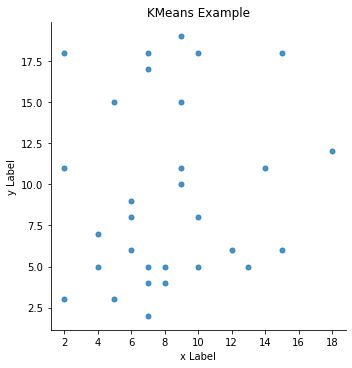

In [13]:
# matpltlib와 seaborn 라이브러리를 사용해 Clustering을 실행할 데이터를 시각화한다.
# lmplot() : 데이터 프레임의 데이터를 x,y좌표를 사용하는 선점도 형태의 그래프를 작성한다.
# sb.lmplot('x축으로 사용할 열 이름', 'y축으로 사용할 열 이름','데이터 프레임 이름')
# fit_reg 옵션은 기본값이 True이고 회귀선 표시 유무를 지정하는데, 회귀선이 없는 그래프는 fit_reg 옵션을 사용하지 않거나 
# True를 사용하면 오류가 발생한다. -> 회귀선이 필요 없는 차트는 fit_reg를 False로 설정한다.
# scatter_kws : 점 크기

sb.lmplot('x','y', data=df, fit_reg=False, scatter_kws={'s':25})
plt.title('KMeans Example') # 그래프의 제목
plt.xlabel('x Label') # x축의 제목
plt.ylabel('y Label') # y축의 제목
pass

In [19]:
# KMeans 알고리즘을 이용해 Cluster 4개를 생성한다.
# 별다른 설정을 하지 않으면 기본적으로 KMeans가 적용되므로 실행할 때마다 값이 변경될 수 있다.
# sklearn 라이브러리의 KMeans() 함수를 이용해 데이터 프레임의 데이터를 학습시킨다.
# n_clusters : 군집화 할 cluster의 갯수를 지정한다.
# KMeans() 함수의  n_clusters 속성으로 군집화 할 cluster의 개수를 지정하고 fit() 함수를 사용해 학습을 시킨다.
kmeans = KMeans(n_clusters=4).fit(points)
# kmeans.cluster_centers_ : 각각의 cluster 중심 위치를 리턴한다.
# print(kmeans.cluster_centers_)

# kmeans.labels_ : 각각의 데이터가 속한 cluster를 리턴한다.
# print(kmeans.labels_)

# df 데이터 프레임에 cluster라는 열을 추가하고 군집화된 결과를 저장한다.
df['cluster'] = kmeans.labels_
# print(df)


# pandas 라이브러리의 to_csv() 함수를 이용해 데이터 프레임을 csv파일로 저장한다.
df.to_csv('save.csv')

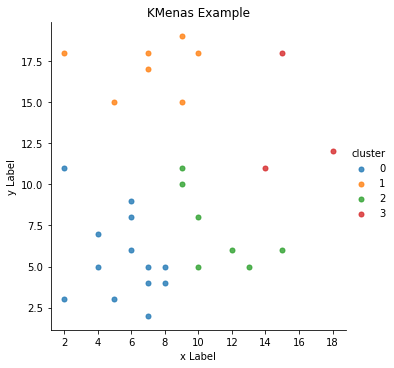

In [20]:
# Clustering된 결과를 시각화한다.
# 군집화된 결과를 hue 속성을 이용해 색으로 구분한다.
# hue = '열 이름'
sb.lmplot('x','y',data=df, fit_reg=False, scatter_kws={'s':25}, hue='cluster')
plt.title('KMenas Example')
plt.xlabel('x Label')
plt.ylabel('y Label')
pass



















